

Objective: Make a model to predict the app rating, with other information about the app provided.

Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. 
The boost will manifest in multiple ways including higher priority in recommendations sections
(“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  
This feature will help bring more attention to newer apps that have the potential.

Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, 
which are provided by the customers, is always a great indicator of the goodness of the app. 
The problem reduces to: predict which apps will have high ratings.

Content: Dataset: Google Play Store data (“googleplaystore.csv”)

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=68ab56c49595bd8a4e5f5dd1e0da972ede244c6884aa46b218264b9f07d5f83b
  Stored in directory: c:\users\shiwa\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics as stc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15 , 8]

Q1. Load the data file using pandas.

In [3]:
df = pd.read_csv (r'C:\simplilearn\python project simplilearn\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data inspection

In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.describe(include = object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


Q2. Check for null values in the data. Get the number of null values for each column.

In [9]:
df.isnull().sum()*100/df.shape[0]

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

Interpretation: There are null values present in the data.
those are 
Rating =           13.596532,
Type   =            0.009224,
Content Rating  =   0.009224,
Current Ver  =      0.073794,
Android Ver  =      0.027673,


Q3. Drop records with nulls in any of the columns.

In [10]:
print("Frame Size before : " , df.shape)
df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver','Android Ver'],axis=0, inplace=True)
print("Frame Size After : " , df.shape)
df.isnull().sum(axis=0)

Frame Size before :  (10841, 13)
Frame Size After :  (9360, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Q4.1 Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

    Q4.1. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

        Q4.1.1.  Extract the numeric value from the column

        Q4.1.2. Multiply the value by 1,000, if size is mentioned in Mb
        
Q4.2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

Q4.3.Installs field is currently stored as string and has values like 1,000,000+. .
        Q4.3.1. Treat 1,000,000+ as 1,000,000

        Q4.3.2. remove ‘+’, ‘,’ from the field, convert it to integer

Q4.4. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.


In [11]:
df=df[-df['Size'].str.contains('Var')]
df["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7723, dtype: object

Q4.1.1.  Extract the numeric value from the column

In [12]:
df.loc[:,"SizeNum"] = df.Size.str.rstrip("Mk+")
df["SizeNum"]

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10833    619
10834    2.6
10836     53
10837    3.6
10840     19
Name: SizeNum, Length: 7723, dtype: object

In [13]:
df.SizeNum = pd.to_numeric(df["SizeNum"])
df.SizeNum.dtype

dtype('float64')

Q4.1.2 Multiply the value by 1,000, if size is mentioned in Mb

In [14]:
df['SizeNum']=np.where(df.Size.str.contains('M'),df.SizeNum*1000, df.SizeNum)

In [15]:
df.Size=df.SizeNum
df.drop('SizeNum',axis=1,inplace=True)

Q4.2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [16]:
df.Reviews = pd.to_numeric(df.Reviews)

In [17]:
df.Reviews.dtype

dtype('int64')

Q4.3.Installs field is currently stored as string and has values like 1,000,000+. 
Q4.3.2. remove ‘+’, ‘,’ from the field, convert it to integer

In [18]:
df['Installs']=df.Installs.str.replace("1000000+","1000000")
df['Installs']=df.Installs.str.replace("+","")

In [19]:
df.Installs=df.Installs.str.replace(",","")
df.Installs=pd.to_numeric(df.Installs)
df.Installs.dtype

dtype('int64')

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Q4.4. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [21]:
df.Price.value_counts()

0          7146
$0.99       105
$2.99       101
$4.99        63
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [22]:
df['Price'] = df['Price'].str.replace('$', '')

In [23]:
df.Price.value_counts()

0         7146
0.99       105
2.99       101
4.99        63
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 68, dtype: int64

In [24]:
df['Price'] = df['Price'].astype(float)


5. Sanity checks:

            5.1. Average rating should be between 1 and 5 as only these values are allowed on the play store.
            Drop the rows that have a value outside this range.

            5.2. Reviews should not be more than installs as only those who installed can review the app.
            If there are any such records, drop them.

            5.3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.



5.1. Average rating should be between 1 and 5 as only these values are allowed on the play store.
Drop the rows that have a value outside this range.

In [27]:
df=df[(df.Rating>=1) & (df.Rating<=5) ]
df.head()
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


5.2. Reviews should not be more than installs as only those who installed can review the app. 
If there are any such records, drop them.

In [28]:
len(df.index)


7723

In [29]:
df.drop(df.index[df.Reviews>df.Installs],axis=0,inplace=True)
len(df.index)

7717

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [30]:
index_free_and_price_gt_0=df.index[((df.Type=='Free')&(df.Price>0))]
if len(index_free_and_price_gt_0)>0:
    print("Dropping following indices:",index_free_and_price_gt_0)
    df.drop(index_free_and_price_gt_0,axis=0,inplace=True)
else:
    print("There is no Free Apps with price >0")

There is no Free Apps with price >0


Interpretation: There is no Free Apps with price >0

5. Performing univariate analysis: 

    5.1. Boxplot for Price

        5.1.1 Are there any outliers? Think about the price of usual apps on Play Store.

    5.2. Boxplot for Reviews

        5.2.1 Are there any apps with very high number of reviews? Do the values seem right?

    5.3. Histogram for Rating

        5.3.1 How are the ratings distributed? Is it more toward higher ratings?

    5.4. Histogram for Size

        5.4.1 Note down your observations for the plots made above. Which of these seem to have outliers?

5.1. Boxplot for Price

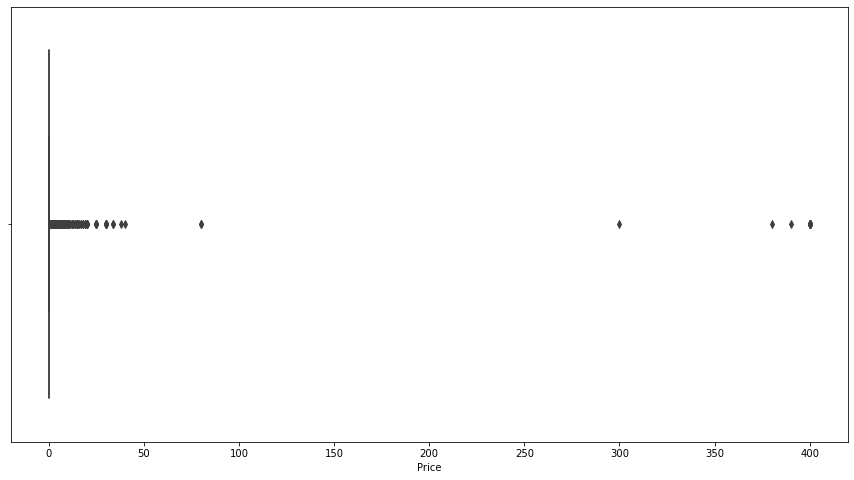

In [31]:
bprice = sns.boxplot(x='Price', data=df)

Interpretation: Most of Price values are less than 50 while there is some near concentration around 80. greater than 100 may be considered outliers

In [43]:
price_standard_deviation=stc.stdev(df.Price)
price_standard_deviation

17.414783874309933

In [44]:
price_mean=stc.mean(df.Price)
price_mean

1.128724893093171

In [45]:
price_outlier_uplimit=price_mean+3*price_standard_deviation
price_outlier_uplimit

53.37307651602297

In [46]:
print("Number of upper outliers is ",len(df[(df.Price>price_outlier_uplimit) ]))

Number of upper outliers is  17


Interpretation: Number of upper outliers is  17

5.2. Boxplot for Reviews

<AxesSubplot:xlabel='Reviews'>

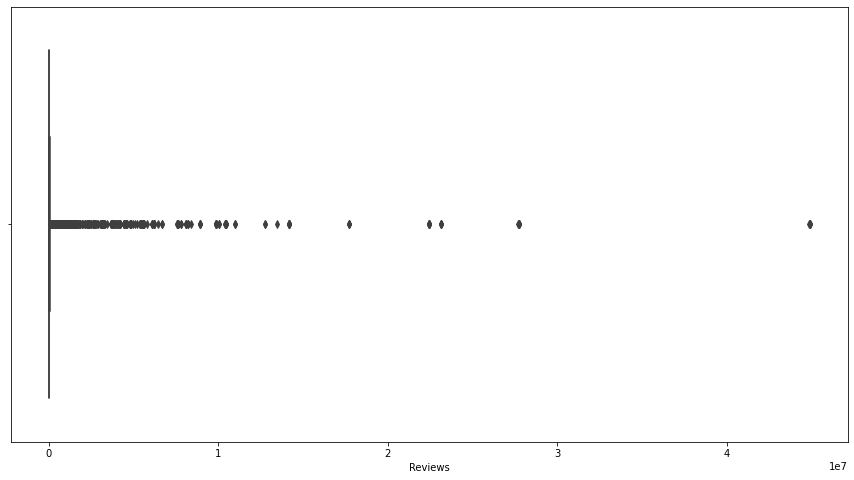

In [47]:
sns.boxplot(x='Reviews',data=df)

Interpretation: Most Apps get about less than 2M review. Roughly, greater than 2M can be
considered outliers

In [48]:
review_standard_deviation=stc.stdev(df.Reviews)
review_standard_deviation

1864639.6094670836

In [49]:
review_mean=stc.mean(df.Reviews)
review_mean

295127.5482700531

In [53]:
review_outlier_uplimit=review_mean+3*review_standard_deviation
rev_outlier_uplimit

5889046.376671304

In [54]:
review_outlier_downlimit=review_mean-3*review_standard_deviation
review_outlier_downlimit

-5298791.280131198

In [55]:
print("number of upper outliers is ",len(df[(df.Reviews>rev_outlier_uplimit) ]))

number of upper outliers is  89


Interpretation: number of upper outliers is  89

5.3. Histogram for Rating

<AxesSubplot:xlabel='Rating', ylabel='Count'>

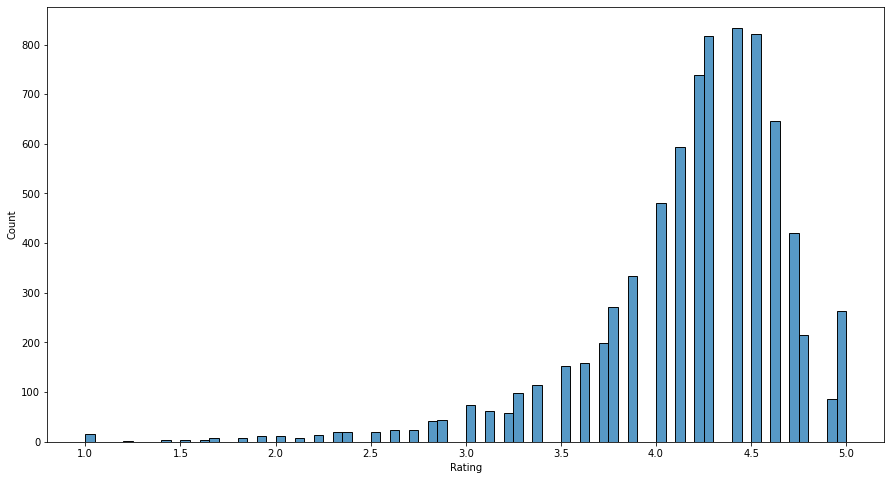

In [56]:
sns.histplot(x='Rating',data=df)

 5.3.1 How are the ratings distributed? Is it more toward higher ratings?
    

Interpretation: ratings distributed towards higher rating

5.4. Histogram for Size

<AxesSubplot:xlabel='Size', ylabel='Count'>

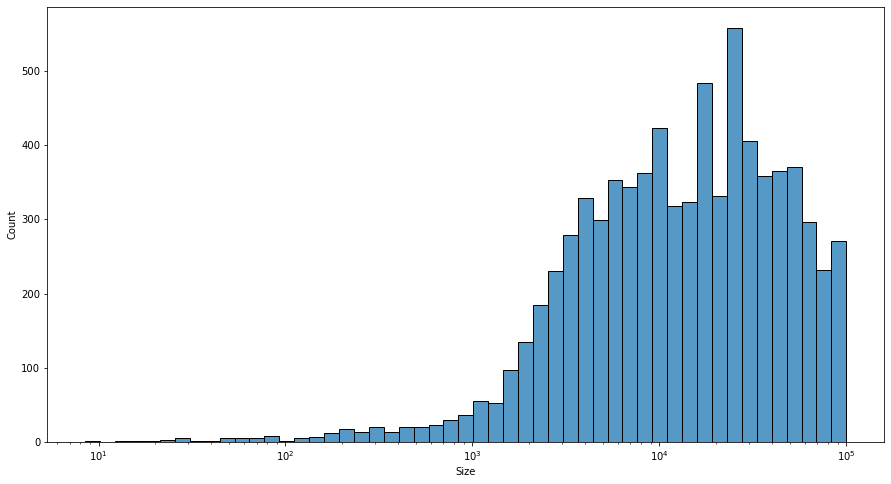

In [59]:
sns.histplot(x='Size',data=df,log_scale=True)

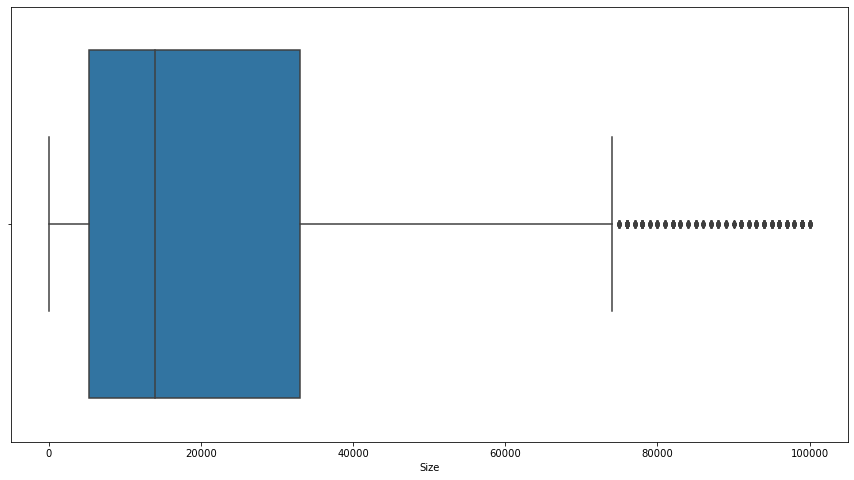

In [60]:
bsize = sns.boxplot(x='Size', data=df)

5.4.1 Note down your observations for the plots made above.

interpretation: most of the app size lies under 100000 

In [61]:
Size_standard_deviation=stc.stdev(df.Size)
review_standard_deviation

1864639.6094670836

In [62]:
Size_mean=stc.mean(df.Size)
Size_mean

22976.614293119088

In [63]:
Size_outlier_uplimit=Size_mean+3*Size_standard_deviation
Size_outlier_uplimit

93346.9260933562

In [64]:
Size_outlier_downlimit=Size_mean-3*Size_standard_deviation
Size_outlier_downlimit

-47393.697507118035

In [65]:
print("number of upper outliers is ",len(df[(df.Size>Size_outlier_uplimit) ]))

number of upper outliers is  148


5.4.1 Note down your observations for the plots made above. Which of these seem to have outliers?


interpretation: App which are more than size of 93346.92 consider as outlier. 
number of outlier are 148

6. Outlier treatment: 

    6.1. Price: From the box plot, it seems like there are some apps with very high price. 
        A price of $200 for an application on the Play Store is very high and suspicious!

            6.1.1. Check out the records with very high price

                6.1.1. Is 200 indeed a high price?

            6.1.2 Drop these as most seem to be junk apps

    6.2. Reviews: Very few apps have very high number of reviews. 
        These are all star apps that don’t help with the analysis and, in fact, will skew it. 
        Drop records having more than 2 million reviews.

    6.3 Installs:  There seems to be some outliers in this field too. 
        Apps having very high number of installs should be dropped from the analysis.

        6.3.1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

        6.3.2 Decide a threshold as cutoff for outlier and drop records having values more than that


6.1 Price: From the box plot, it seems like there are some apps with
very high price. A price of $200 for an application on the Play Store is very high and suspicious!

6.1.1 Check out the records with very high price

In [66]:
df[df.Price>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [68]:
print("Number of Apps with price >= 200 are ",len(df[(df.Price>=200) ]))

Number of Apps with price >= 200 are  15


6.1.1. Is 200 indeed a high price?

     6.1.2 Drop these as most seem to be junk apps

In [69]:
df.drop(df.index[(df.Price>=200)], inplace=True)
len(df.index)

7702

6.2. Reviews: Very few apps have very high number of reviews.

 These are all star apps that don’t help with the analysis and, in fact, will skew it. 
 Drop records having more than 2 million reviews.

In [70]:
df.drop(df.index[(df.Reviews>=2000000)], inplace=True)
len(df.index)

7483

6.3 Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

6.3.1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [71]:
install_10_perc=np.percentile(df.Installs, 10)
install_10_perc

1000.0

In [72]:
install_25_perc=np.percentile(df.Installs, 25)
install_25_perc

10000.0

In [73]:
install_50_perc=np.percentile(df.Installs, 50)
install_50_perc

100000.0

In [74]:
install_70_perc=np.percentile(df.Installs, 70)
install_70_perc

1000000.0

In [75]:
install_90_perc=np.percentile(df.Installs, 90)
install_90_perc

10000000.0

In [76]:
install_95_perc=np.percentile(df.Installs, 95)
install_95_perc

10000000.0

In [77]:
install_99_perc=np.percentile(df.Installs, 99)
install_99_perc

50000000.0

<AxesSubplot:xlabel='Installs', ylabel='Count'>

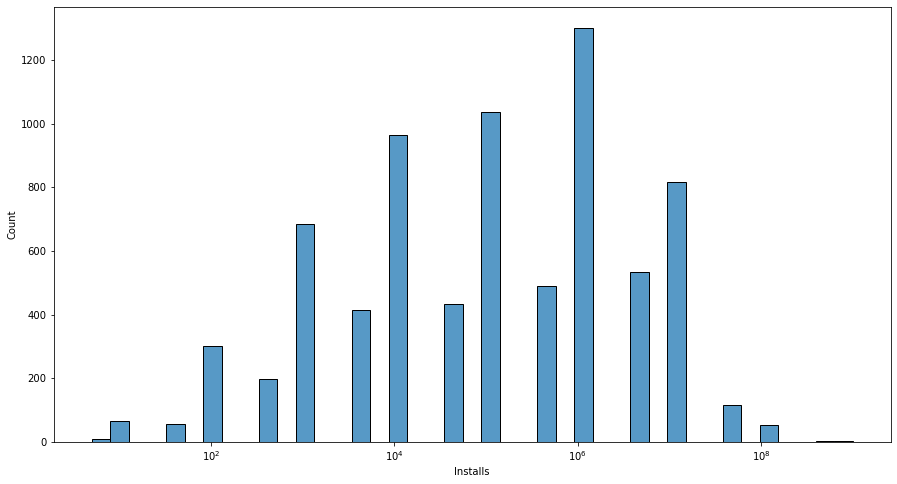

In [78]:
sns.histplot(data=df,x='Installs',log_scale=True)

In [79]:
Installs_standard_deviation=stc.stdev(df.Installs)
Installs_standard_deviation

27818305.317482274

In [80]:
Installs_mean=stc.mean(df.Installs)
Installs_mean

3947464.5449685953

In [81]:
Installs_outlier_uplimit=Installs_mean+3*Installs_standard_deviation
Installs_outlier_uplimit

87402380.49741541

In [83]:
print("number of upper outliers is ",len(df[(df.Installs>Installs_outlier_uplimit) ]))

number of upper outliers is  60


In [86]:
df.drop(df.index[df.Installs >= 87402380.49741541],inplace=True)
len(df.index)

7423

I Decide  more than that of 99% as an threshol cutoff for outlier and drop records having values more than that.

In [87]:
df.drop(df.index[df.Installs >= install_99_perc],inplace=True)
len(df.index)

7307

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., 
our target variable rating. Make scatter plots (for numeric features) and box plots (for character features)
to assess the relations between rating and the other features.

    7.1 Make scatter plot/joinplot for Rating vs. Price

        7.1.1 What pattern do you observe? Does rating increase with price?

    7.2 Make scatter plot/joinplot for Rating vs. Size

        7.2.1 Are heavier apps rated better?

    7.3 Make scatter plot/joinplot for Rating vs. Reviews

        7.3.1 Does more review mean a better rating always?

    7.4 Make boxplot for Rating vs. Content Rating

        7.4.1 Is there any difference in the ratings? Are some types liked better?

    7.5 Make boxplot for Ratings vs. Category

        7.5.1 Which genre has the best ratings?

    7.6 For each of the plots above, note down your observation

7.1. Make scatter plot/joinplot for Rating vs. Price

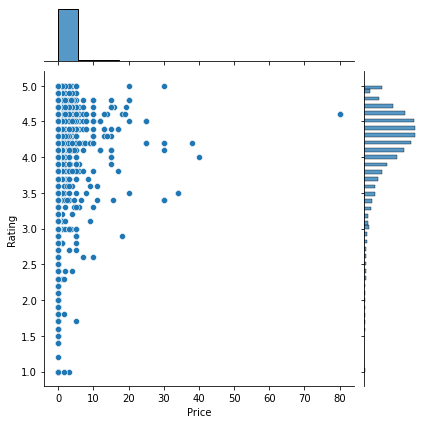

In [89]:
sns.jointplot(data=df,y='Rating',x='Price')

7.1.1 What pattern do you observe? Does rating increase with price? 
interpretation: Most of Apps with high price get > 3 Rating but this is because majority of apps are with low price. In addition most apps get rating > 3. Concusion: We cannot consider there is a good relationship between Rating and Price. It seems Price has limited impact on Rating.

7.2 Make scatter plot/joinplot for Rating vs. Size

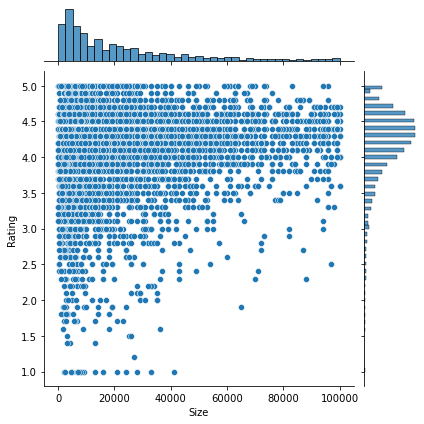

In [90]:
sns.jointplot(data=df,y='Rating',x='Size')

7.2.1  Are heavier apps rated better?
interpretation:if we look to the area where most apps rated > 3 almost the points are evenly
distributed
The relationship between Size and rating is very weak

7.3. Make scatter plot/joinplot for Rating vs. Reviews

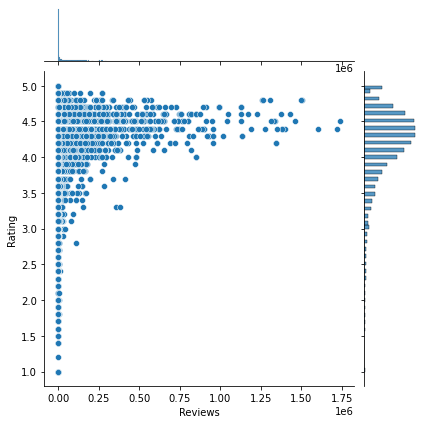

In [91]:
sns.jointplot(data=df,y='Rating',x='Reviews')

7.3.1 Does more review mean a better rating always?
interpretation: Although the relationship seems also not so strong, but we can notice that there is some concentration of apps with higher reviews in high rating area. It seems good apps get more reviews than
others

7.4 Make boxplot for Rating vs. Content Rating

In [92]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

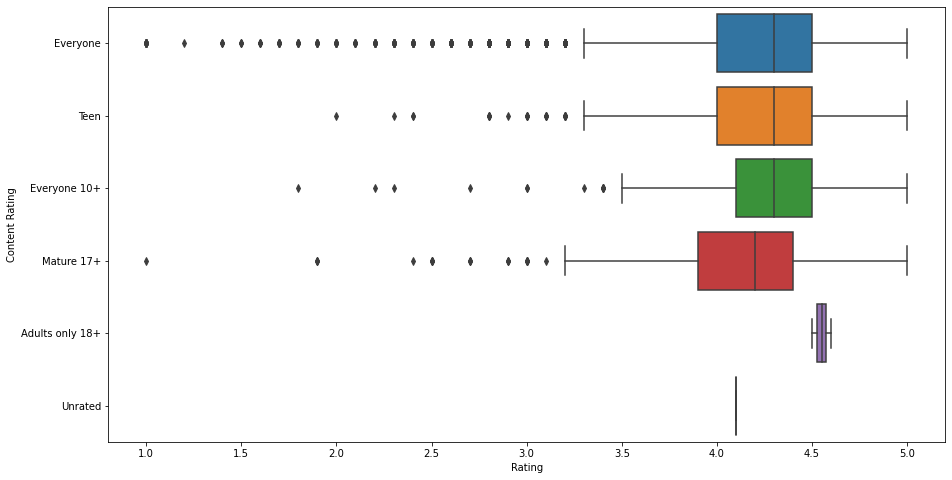

In [93]:
sns.boxplot(data=df,x='Rating',y='Content Rating')

 7.4.1 Is there any difference in the ratings? Are some types liked better? Is there any difference in the ratings? Are some types liked better?
interpretation: Apps of Adults only 18+ has higher rating than others while Mature 17+ gets less liks. Others
seem to be closed. Content has good impact on Rating

<AxesSubplot:xlabel='Rating', ylabel='Category'>

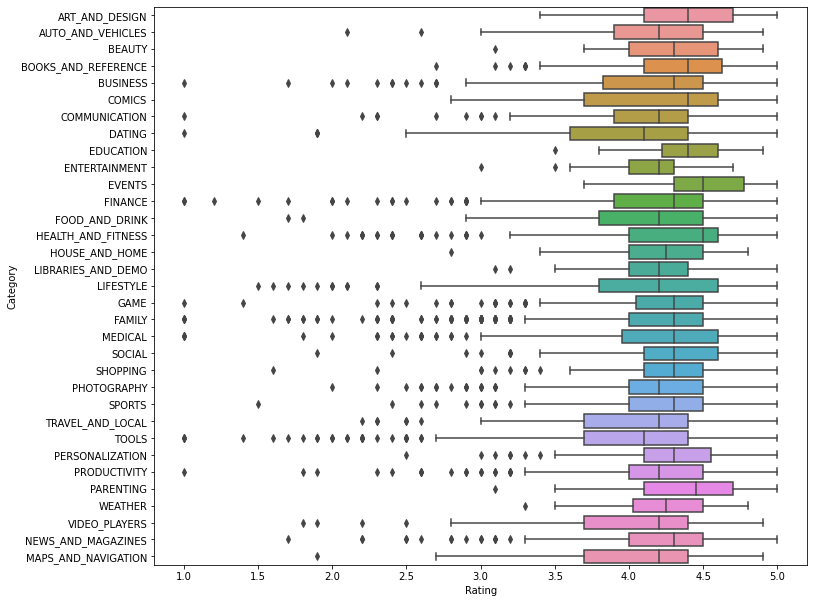

In [95]:
#7.5 Make boxplot for Ratings vs. Category
a4_dims = (11.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df,x='Rating',y='Category',ax=ax)

7.5.1 Which genre has the best ratings?

while observing box plot i found that the Events genere has higest rating.

   7.6 For each of the plots above, note down your observation

while observing above plot i foungout that Rating vs. Content Rating and Ratings vs. Category.
gives better understanding of app rating 

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

    8.1Reviews and Install have some values that are still relatively very high. 
    Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

    8.2Drop columns App, Last Updated, Current Ver, and Android Ver.
    These variables are not useful for our task.

    8.3Get dummy columns for Category, Genres, and Content Rating. 
    This needs to be done as the models do not understand categorical data, and all data should be numeric.
    Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [96]:
#8.1
inp1=df.copy()
inp1.Reviews=inp1.Reviews.apply(np.log1p)

In [97]:
#8.2
inp1.drop(columns=['App','Last Updated','Current Ver','Android Ver'],inplace=True)

In [98]:
inp1.shape

(7307, 9)

In [99]:
#8.3
inp2= pd.get_dummies(inp1)

In [100]:
inp2.shape

(7307, 158)

9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [101]:
data = inp2.drop(columns='Rating')
data.shape

(7307, 157)

In [102]:
target = pd.DataFrame(inp2.Rating)
target.shape

(7307, 1)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=3)
print("x_train shape is ", x_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", x_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (5114, 157)
y_train shape is  (5114, 1)
x_test shape is  (2193, 157)
y_test shape is  (2193, 1)


11 . Model building

    11.1 Use linear regression as the technique

    11.2 Report the R2 on the train set

In [105]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [112]:
train_predict=model.predict(x_train)

In [114]:
print("R2 value of the model(by train) is ", r2_score(y_train, train_predict))

R2 value of the model(by train) is  0.08010678015666617


12. Make predictions on test set and report R2.

In [115]:
test_predict=model.predict(x_test)

In [116]:
print("R2 value of the model(by test) is ", r2_score(y_test, test_predict))

R2 value of the model(by test) is  0.0522779707476938


In [2]:
pip install pandoc --version

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29557 sha256=09244a21afd662f3f776cb21e9290a0e681494d35be789970f543e2534ed9a2e
  Stored in directory: c:\users\shiwa\appdata\local\pip\cache\wheels\2d\da\b1\54ff0401ef9b07b60c7fc9cffe616f243cf27dc3d04bd5d5ef
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.
